# Copyright Netherlands eScience Center <br>
** Function     : Paper Figure - OMET in reanalyses and OSNAP ** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2019.03.15 ** <br>
** Last Update  : 2019.03.15 ** <br>
Description     : This script serves to prepare figures for the paper about the Bjerknes compensation in the subpolar region. It compares OMET from reanalyses and OSNAP at approximately 60N.<br>

Return Values   : png <br>
Caveat!         : There are only 21 months observations available for OSNAP. From 31 July (August) 2014 to 20 April 2016.<br>

In [1]:
%matplotlib inline

import sys
sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import scipy
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import meta.statistics
import meta.visualizer
from scipy import stats
import cartopy.crs as ccrs

Initialization - Start with location of input and extraction of variables
Time span of each product:
- **ERA-Interim** 1979 - 2016
- **MERRA2**      1980 - 2016
- **JRA55**       1979 - 2015
- **ORAS4**       1958 - 2017
- **GLORYS2V3**   1993 - 2014
- **SODA3**       1980 - 2015

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            'HoF' : 334,        # heat of fusion of ice [KJ/Kg] 
            'rho_ice' : 0.91    # density of sea ice [g/cm3]
            }

In [3]:
print ('****************************************************************************')
print ('********************    latitude index of insteret     *********************')
print ('****************************************************************************')
# 60N
lat_ORAS4_60 = 233
lat_GLORYS2V3_60 = 788
lat_SODA3_60 = 789
# after a cut to 20-90 N
lat_ORAS4_60_cut = 53
lat_GLORYS2V3_60_cut = 209
lat_SODA3_60_cut = 220

****************************************************************************
********************    latitude index of insteret     *********************
****************************************************************************


In [4]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    # OMET
    datapath_ORAS4 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/warehouse_met'
    datapath_SODA3 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/SODA3/postprocessing'
    datapath_OSNAP = '/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/Oceanography/OSNAP'
    # mask
    datapath_mask_ORAS4 ='/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORAS4'
    datapath_mask_SODA3 ='/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/SODA3'
    
    output_path = '/home/ESLT0068/NLeSC/PhD/Paperwork/Article/AMET_OMET/ESD/figures/'
    #####################################################################################
    print ('*********************** extract variables *************************')
    dataset_ORAS4_OMET = Dataset(os.path.join(datapath_ORAS4,
                                              'oras_model_monthly_1958_2017_omet.nc'))
    dataset_SODA3_OMET = Dataset(os.path.join(datapath_SODA3,
                                              'OMET_SODA3_model_5daily_1980_2015_E_zonal_int.nc'))
    dataset_SODA3_OMET_point = Dataset(os.path.join(datapath_SODA3,
                                               'OMET_SODA3_model_5daily_1980_2015_E_point.nc'))
    dataset_OSNAP_OMET = Dataset(os.path.join(datapath_OSNAP,
                                              'OSNAP_Transports_201408_201604_2018.nc'))
    dataset_mask_ORAS4 = Dataset(datapath_mask_ORAS4 + os.sep + 'mesh_mask.nc')
    dataset_mask_SODA3 = Dataset(datapath_mask_SODA3 + os.sep + 'topog.nc')
    # extract time series
    # from 20N - 90N
    #OMET_ORAS4 = dataset_ORAS4_OMET.variables['E_int'][21:-1,:,180:]/1000 # from Tera Watt to Peta Watt # start from 1979
    #OMET_SODA3 = dataset_SODA3_OMET.variables['E'][:,:,569:]/1000
    OMET_OSNAP = dataset_OSNAP_OMET.variables['MHT'][:] # PW
    OMET_ERR_OSNAP = dataset_OSNAP_OMET.variables['MHT_ERR'][:] # uncertainty of MHT (PW)
    
    OMET_ORAS4 = dataset_ORAS4_OMET.variables['E_total'][21:-1,:,:,:]/1E+3     # from 2004
    OMET_SODA3 = dataset_SODA3_OMET_point.variables['E'][:,:,:,:]/1E+3  # from 2004
    # dimensions info
    # time
    year_ORAS4 = dataset_ORAS4_OMET.variables['year'][21:-1]
    year_SODA3 = dataset_SODA3_OMET.variables['year'][:]
    time_OSNAP = dataset_OSNAP_OMET.variables['TIME'][:]
    # ocean grid
    latitude_ORAS4 = dataset_ORAS4_OMET.variables['latitude_aux'][180:]
    latitude_SODA3 = dataset_SODA3_OMET.variables['latitude_aux'][569:]
    # mask
    mask_ORAS4 = dataset_mask_ORAS4.variables['vmask'][0,0,:,:]
    mask_SODA3 = dataset_mask_SODA3.variables['wet_c'][:]

*********************** extract variables *************************


In [8]:
    # 60N
    print(OMET_OSNAP[:])
    print(latitude_ORAS4[lat_ORAS4_60_cut])
    print(latitude_GLORYS2V3[lat_GLORYS2V3_60_cut])
    print(latitude_SODA3[lat_SODA3_60_cut])

[0.42120884 0.33641971 0.56545307 0.47515039 0.3250966  0.45794352
 0.41212005 0.3979717  0.50685051 0.43450566 0.58505123 0.52259618
 0.56113167 0.34751812 0.50840028 0.50130104 0.41958955 0.48435963
 0.47315336 0.36387848 0.45297215]
60.018433
60.019276
60.021908


In [5]:
    print ('*********************** Locations on Curvilinear Grid *************************')
    # ORCA1 (ORAS4)
    ii_ORCA1_OSNAP = np.array([233,234,235,236,237,238,239,240,240,240,
                               240,241,241,241,242,243,244,245,246,247,
                               248,249,250,251,252,253,254,255,256,257,
                               258,259,260,261,262,263,264,265,266,267,
                               268,269,270,271,272,273,274,275,276,277,
                               278,279], dtype=int)
    jj_ORCA1_OSNAP = np.array([226,226,226,226,226,226,227,228,229,230,
                               231,232,233,234,235,236,236,237,236,235,
                               235,235,234,234,234,234,233,233,233,232,
                               232,231,231,231,231,231,231,231,232,232,
                               232,232,232,232,232,231,231,231,231,230,
                               230,230], dtype=int)
    # MOM5 (SODA3)
    ii_MOM5_OSNAP = np.array([895,896,897,898,899,900,901,902,903,904,
                              905,906,907,908,909,910,911,912,913,914,
                              915,916,917,918,919,920,921,921,921,921,
                              921,922,922,922,922,922,923,923,923,923,
                              923,924,924,924,925,925,926,926,926,926,
                              926,927,927,927,927,927,928,928,928,928,
                              928,929,930,931,932,933,933,934,935,936,
                              937,938,939,940,941,942,943,944,945,946,
                              947,948,949,950,951,952,953,954,955,956,
                              957,958,959,960,961,962,963,964,965,966,
                              967,968,969,970,971,972,973,974,975,976,
                              977,978,979,980,981,982,983,984,985,986,
                              987,988,989,990,991,992,993,994,995,996,
                              997,998,999,1000,1001,1002,1003,1004,1005,
                              1006,1007,1008,1009,1010,1011,1012,1013,1014,
                              1015,1016,1017,1018,1019,1020,1021,1022,1023,
                              1024,1025,1026,1027,1028,1029,1030,1031,1032,
                              1033,1034,1035,1036,1037,1038,1039,1040,1041,
                              1042,1043,1044,1045,1046,1047,1048,1049,1050,
                              1051,1052,1053,1054,1055,1056,1057,1058,1059,
                              1060,1061,1062,1063,1064,1065,1066,1067,1068,
                              1069,1070,1071,1072,1073,1074,1075,1076,1077,
                              1078,1079,1080,1081,1082,1083,1084,1085,1086,
                              1087,1088,1089,1090,1091,1092,1093,1094], dtype=int)
    jj_MOM5_OSNAP = np.array([740,740,740,740,740,741,741,741,742,742,
                              742,742,743,743,743,743,743,743,744,745,
                              746,746,747,748,749,749,749,750,751,752,
                              753,754,755,756,757,758,759,760,761,762,
                              763,764,765,766,767,768,769,770,771,772,
                              773,774,775,776,777,778,779,780,781,782,
                              783,783,783,784,785,786,787,788,789,790,
                              791,791,791,791,791,791,791,791,791,791,
                              791,791,791,790,790,790,790,790,789,789,
                              789,789,789,788,788,788,788,788,787,787,
                              787,787,787,786,786,786,786,786,785,785,
                              785,785,784,784,784,784,784,783,783,783,
                              783,783,782,782,782,782,782,781,781,781,
                              781,781,780,779,778,777,776,775,774,773,
                              773,773,773,773,773,773,773,773,773,773,
                              773,773,773,773,773,773,773,773,773,773,
                              773,773,773,773,773,773,774,774,774,774,
                              774,774,774,774,774,774,774,774,774,774,
                              774,774,774,774,774,774,774,774,774,774,
                              774,774,774,774,774,773,772,771,770,769,
                              768,768,768,768,768,767,767,767,766,766,
                              766,765,765,765,764,764,764,764,763,763,
                              763,762,762,762,761,761,761,761], dtype=int)

*********************** Locations on Curvilinear Grid *************************


In [6]:
    print ('********************* Pick up OMET in terms of ii and jj ***********************')
    OMET_ORAS4_OSNAP = np.zeros((len(year_ORAS4),12,len(ii_ORCA1_OSNAP)),dtype= float)
    OMET_SODA3_OSNAP = np.zeros((len(year_SODA3),12,len(ii_MOM5_OSNAP)),dtype= float)
    for i in np.arange(len(year_ORAS4)):
        for j in np.arange(12):
            for k in np.arange(len(ii_ORCA1_OSNAP)):
                OMET_ORAS4_OSNAP[i,j,k] = OMET_ORAS4[i,j,jj_ORCA1_OSNAP[k],ii_ORCA1_OSNAP[k]] \
                                          * mask_ORAS4[jj_ORCA1_OSNAP[k],ii_ORCA1_OSNAP[k]]
    for i in np.arange(len(year_SODA3)):
        for j in np.arange(12):
            for k in np.arange(len(ii_MOM5_OSNAP)):
                OMET_SODA3_OSNAP[i,j,k] = OMET_SODA3[i,j,jj_MOM5_OSNAP[k],ii_MOM5_OSNAP[k]] \
                                          * mask_SODA3[jj_MOM5_OSNAP[k],ii_MOM5_OSNAP[k]]
    # take the integral
    OMET_ORAS4_OSNAP_int = np.sum(OMET_ORAS4_OSNAP,2)
    OMET_SODA3_OSNAP_int = np.sum(OMET_SODA3_OSNAP,2)  

********************* Pick up OMET in terms of ii and jj ***********************


In [7]:
    print ('***********!@#$%^&*  OMET time series !@#$%^&***********')
    print ('Prepare data for plots!')
    # time series for comparison
    OMET_ORAS4_series = OMET_ORAS4_OSNAP_int.reshape(len(year_ORAS4)*12)
    #OMET_GLORYS2V3_series = OMET_GLORYS2V3[:,:,lat_GLORYS2V3_60_cut].reshape(len(year_GLORYS2V3)*12)
    OMET_SODA3_series = OMET_SODA3_OSNAP_int.reshape(len(year_SODA3)*12)
    # pick-up series for certain period
    # pay attention to time
    # from Aug 2014 to April 2016 (21 months)
    OMET_ORAS4_series_pickup = OMET_ORAS4_series[35*12+7:35*12+7+21]
    OMET_SODA3_series_pickup = OMET_SODA3_series[34*12+7:]
    # series index
    index = np.arange(21) # Aug 2014 to April 2016 (21 months)
    index_time = ['201408','201411','201502','201505','201508','201511',
                  '201602','201605']

***********!@#$%^&*  OMET time series !@#$%^&***********
Prepare data for plots!


In [12]:
    print(len(OMET_ORAS4_series_pickup))
    print(len(OMET_SODA3_series_pickup))

21
17


In [8]:
    # uncertainty of OSNAP
    OMET_OSNAP_max = OMET_OSNAP + OMET_ERR_OSNAP
    OMET_OSNAP_min = OMET_OSNAP - OMET_ERR_OSNAP
    # statistics
    # standard deviation
    print('std of OMET - ORAS4')
    OMET_ORAS4_std = np.std(OMET_ORAS4_series)
    #print('std of OMET - GLORYS2V3')
    #OMET_GLORYS2V3_std = np.std(OMET_GLORYS2V3_series)
    print('std of OMET - SODA3')
    OMET_SODA3_std = np.std(OMET_SODA3_series)
    print('std of OMET - OSNAP')
    OMET_OSNAP_std = np.std(OMET_OSNAP)    
    # mean
    print('mean of OMET - ORAS4')
    OMET_ORAS4_mean = np.mean(OMET_ORAS4_series)
    #print('mean of OMET - GLORYS2V3')
    #OMET_GLORYS2V3_mean = np.mean(OMET_GLORYS2V3_series)
    print('mean of OMET - SODA3')
    OMET_SODA3_mean = np.mean(OMET_SODA3_series)
    print('mean of OMET - OSNAP')
    OMET_OSNAP_mean = np.mean(OMET_OSNAP)

std of OMET - ORAS4
std of OMET - SODA3
std of OMET - OSNAP
mean of OMET - ORAS4
mean of OMET - SODA3
mean of OMET - OSNAP


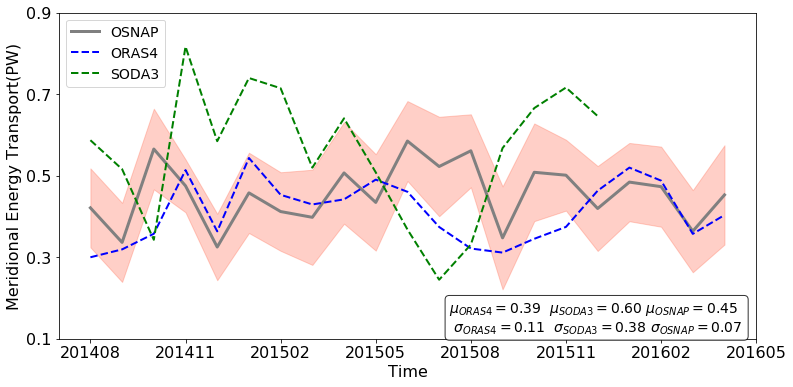

In [13]:
    text_content = '$\mu_{ORAS4}=%.2f$  $\mu_{SODA3}=%.2f$ $\mu_{OSNAP}=%.2f$ \n $\sigma_{ORAS4}=%.2f$  $\sigma_{SODA3}=%.2f$ $\sigma_{OSNAP}=%.2f$ '\
                    % (OMET_ORAS4_mean, OMET_SODA3_mean, OMET_OSNAP_mean, OMET_ORAS4_std, OMET_SODA3_std, OMET_OSNAP_std)
    # plot AMET time series
    fig = plt.figure()
    fig.set_size_inches(12.5, 6)
    plt.plot(index[:], OMET_OSNAP, color='gray',linestyle='-',
             linewidth=3.0, label='OSNAP')
    plt.fill_between(index[:],OMET_OSNAP_max,
                     OMET_OSNAP_min,alpha=0.3,edgecolor='tomato', facecolor='tomato')
    plt.plot(index[:], OMET_ORAS4_series_pickup,
             'b--', linewidth=2.0, label='ORAS4')
    plt.plot(index[:-4], OMET_SODA3_series_pickup,
             'g--', linewidth=2.0, label='SODA3')
    plt.xlabel("Time",fontsize=16)
    plt.xticks(np.arange(0,len(index)+1,3), index_time,fontsize=16)
    plt.ylabel("Meridional Energy Transport(PW)",fontsize=16)
    plt.yticks(np.arange(0.1,1.0,0.2),fontsize=16)
    plt.legend(frameon=True, loc=2, prop={'size': 14})
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax = plt.gca()
    ax.text(0.56,0.12,text_content,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)
    plt.show()
    fig.savefig(os.path.join(output_path,'OMET_series_OSNAP.png'),dpi=300)
    plt.close(fig)

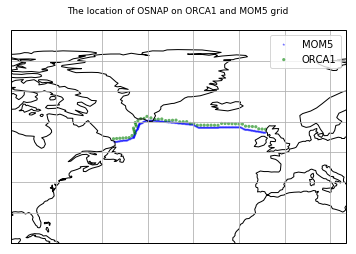

In [26]:
    # pin point on map
    # get the coordinate of curvilinear grid
    # latitude
    lat_ORAS4_ORCA = dataset_ORAS4_OMET.variables['gphiv'][:]
    lat_SODA3_MOM = dataset_SODA3_OMET_point.variables['latitude'][:]
    # longitude
    lon_ORAS4_ORCA = dataset_ORAS4_OMET.variables['glamv'][:]
    lon_SODA3_MOM = dataset_SODA3_OMET_point.variables['longitude'][:]
    # create new array for points
    lat_ORCA1 = np.zeros(len(jj_ORCA1_OSNAP),dtype=float)
    lon_ORCA1 = np.zeros(len(ii_ORCA1_OSNAP),dtype=float)

    lat_MOM5 = np.zeros(len(jj_MOM5_OSNAP),dtype=float)
    lon_MOM5 = np.zeros(len(ii_MOM5_OSNAP),dtype=float)
    
    for i in np.arange(len(jj_ORCA1_OSNAP)):
        lat_ORCA1[i] = lat_ORAS4_ORCA[jj_ORCA1_OSNAP[i],ii_ORCA1_OSNAP[i]]
        lon_ORCA1[i] = lon_ORAS4_ORCA[jj_ORCA1_OSNAP[i],ii_ORCA1_OSNAP[i]]

    for i in np.arange(len(jj_MOM5_OSNAP)):
        lat_MOM5[i] = lat_SODA3_MOM[jj_MOM5_OSNAP[i],ii_MOM5_OSNAP[i]]
        lon_MOM5[i] = lon_SODA3_MOM[jj_MOM5_OSNAP[i],ii_MOM5_OSNAP[i]]
    fig1 = plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    XX1, YY1 = lon_ORCA1, lat_ORCA1
    XX3, YY3 = lon_MOM5, lat_MOM5
    # alpha bleding factor with map
    ax.scatter(XX3,YY3,10,marker='*',color='b',alpha=0.6, edgecolor='none',label='MOM5',transform=ccrs.Geodetic())
    ax.scatter(XX1,YY1,10,marker='o',color='g',alpha=0.6, edgecolor='none',label='ORCA1',transform=ccrs.Geodetic())
    # transform=ccrs.PlateCarree()
    ax.set_extent([-90, 20, 20, 90])
    ax.coastlines()
    ax.gridlines()
    plt.title('The location of OSNAP on ORCA1 and MOM5 grid',fontsize = 9, y=1.05)
    plt.legend()
    plt.show()
    fig1.savefig(os.path.join(output_path,"location_ORCA_MOM_OSNAP.jpeg"),dpi=300)